In [11]:
# %load ./include/header.py
import numpy as np
import matplotlib.pyplot as plt
import sys
sys.path.append('./include')
import ml4s
import json
from jax import jacfwd
import jax.numpy as jnp
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
plt.style.use('./include/notebook.mplstyle')
np.set_printoptions(linewidth=120)
ml4s._set_css_style('./include/bootstrap.css')
colors = plt.rcParams['axes.prop_cycle'].by_key()['color']

## Part a
load the data from teh file and produce a plot of S vs.$\delta$

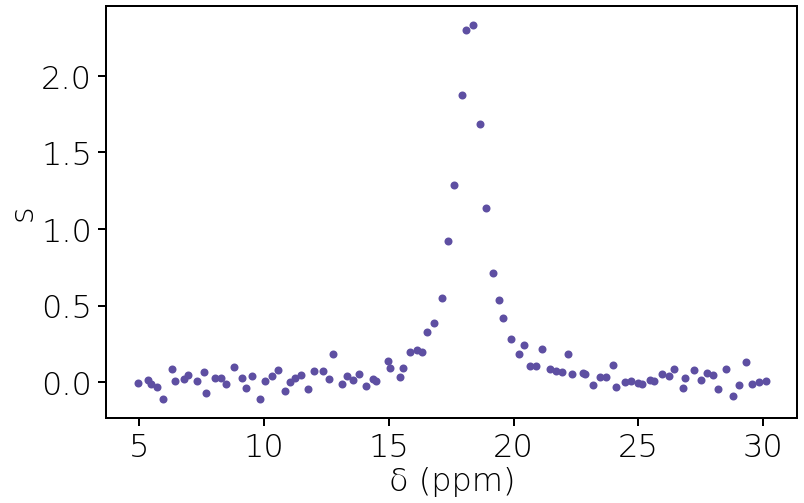

In [12]:
file_name = '../A02/C60_nmr.dat'
δ,S = np.loadtxt(file_name, unpack=True)
x=δ
y=S
plt.plot(δ,S, 'o', ms=3)
plt.xlabel('δ (ppm)')
plt.ylabel('s');

## Part b
Perform a least squares minimization via gradient descent in order to extract the optimal parameters $\alpha$ and $\beta$. These should be saved to disk in a C60_optimal.json file with the exact form (hint use indent=1 as an option to json.dump()):

{
"alpha": val,
"beta": val,
"num_iter": val,
"eta": val
}
    
where val are your calculated values, num_iter is the number of iterations, and eta is your
learning rate. This file should be submitted in your github repository and be locatable at the
path: netid/ml4s_HW/A02/C60_optimal.json.

## Note
The cost function is what we're trying to minimize
$$ C(\alpha,\beta) = \frac{1}{2N}\sum_{n=1}^N |S_{\rm model}(\delta^{(n)},\alpha,\beta)-S^{(n)}|^2 $$


In [13]:
def C(w,x,y):
    S=1/((x-w[0])**2+w[1])
    a=jnp.average((S-y)**2)
    return a

In [14]:
#function is cost func, C
dc_dw=jacfwd(C,argnums=0)

# hyperparameters
η = 0.5
γ = 0.9
v = np.zeros(2)
w = np.array([18.0,0.5])
num_iter = 50

for i in range(num_iter):
    # perform the NAG update
    v = γ*v + η*dc_dw(w-γ*v,x,y)
    w -= v
z=np.array(w)
α=z[0]
β=z[1]

In [15]:
data={
    "alpha": float(α) ,
    "beta": float(β) ,
    "num_iter": num_iter ,
    "eta": η
}
out_file = open("C60_optimal.json", 'w')
json.dump(data, out_file, indent=1)
out_file.close()

## Part c
Produce a final plot that includes the data, a curve of best fit. Use a legend to advertise the form of the fit function with your exacted parameter values.


In [16]:
def S_model(δ,α,β):
    S=1/((δ-α)**2+β)
    return S

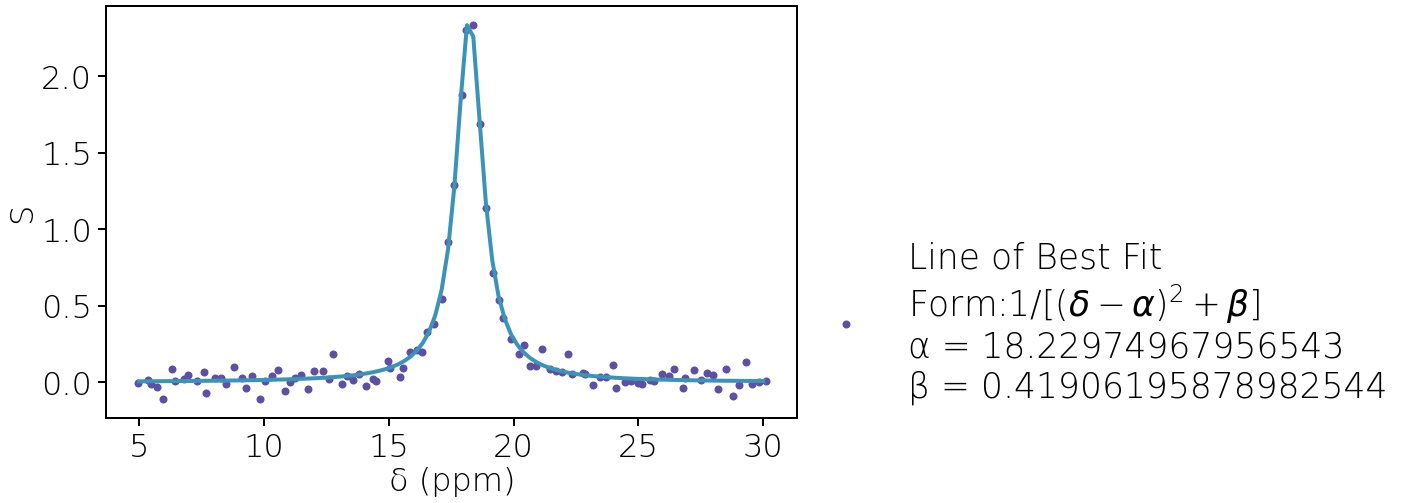

In [17]:
plt.plot(δ,S, 'o', ms=3)
plt.xlabel('δ (ppm)')
plt.ylabel('S');
δ_fit = np.linspace(5,30,100)
plt.plot(δ_fit, S_model(δ_fit,α,β))
plt.legend([f'Line of Best Fit\nForm:$1/[(δ-α)^2+β]$\nα = {α}\nβ = {β}'],fontsize=('xx-large'),loc=(1,0.0))

## Part d
Extract the optimal parameters using feature maps. You should append two
additional fields to your .json called alpha_fm and beta_fm. How do these parameters
compare to those you found in part (b)? Is the fit better or worse?